In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Data loading

In [2]:
weather_df = pd.read_csv('chicago_weather.csv')
transport_df= pd.read_csv('CTA_-_Ridership_-_Daily_Boarding_Totals_20240531.csv')

In [3]:
weather_df.tail()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,QV2M,WS10M
8334,2023,10,27,19.98,8.63,9.64,7.34
8335,2023,10,28,10.86,7.08,5.55,6.48
8336,2023,10,29,10.61,5.50,5.92,6.71
8337,2023,10,30,6.15,2.73,3.66,7.15
8338,2023,10,31,5.98,2.02,3.85,8.22


In [4]:
transport_df.tail()

,service_date,day_type,bus,rail_boardings,total_rides
8517,02/25/2024,U,280214,175446,455660
8518,02/26/2024,W,560355,347691,908046
8519,02/27/2024,W,587359,392420,979779
8520,02/28/2024,W,549028,375242,924270
8521,02/29/2024,W,577283,386672,963955


##  join the two datasets based on the date

In [5]:
transport_df['service_date'] = pd.to_datetime(transport_df['service_date'])

transport_df['YEAR'] = transport_df['service_date'].dt.year
transport_df['MO'] = transport_df['service_date'].dt.month
transport_df['DY'] = transport_df['service_date'].dt.day

WR_df = pd.merge(weather_df, transport_df, on=['YEAR', 'MO', 'DY'], how='inner')

WR_df.tail()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,QV2M,WS10M,service_date,day_type,bus,rail_boardings,total_rides
8396,2023,10,27,19.98,8.63,9.64,7.34,2023-10-27,W,503840,373004,876844
8397,2023,10,28,10.86,7.08,5.55,6.48,2023-10-28,A,360484,275006,635490
8398,2023,10,29,10.61,5.50,5.92,6.71,2023-10-29,U,250473,185823,436296
8399,2023,10,30,6.15,2.73,3.66,7.15,2023-10-30,W,551840,367453,919293
8400,2023,10,31,5.98,2.02,3.85,8.22,2023-10-31,W,520069,390110,910179


In [6]:
WR_df.drop(['DY', 'service_date'], axis=1, inplace=True)
WR_df.head()

,YEAR,MO,T2M_MAX,T2M_MIN,QV2M,WS10M,day_type,bus,rail_boardings,total_rides
0,2001,1,-2.89,-6.59,2.32,5.30,U,297192,126455,423647
1,2001,1,-4.20,-8.83,2.01,6.62,W,780827,501952,1282779
2,2001,1,-1.83,-9.81,2.50,8.53,W,824923,536432,1361355
3,2001,1,-0.00,-5.95,2.81,7.81,W,870021,550011,1420032
4,2001,1,1.80,-3.50,3.54,9.33,W,890426,557917,1448343


In [7]:
# Calculate the sum of null values in WR_df
null_values_sum = WR_df.isnull().sum().sum()

print("Sum of null values in WR_df:", null_values_sum)

Sum of null values in WR_df: 0


In [8]:
WR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            8401 non-null   int64  
 1   MO              8401 non-null   int64  
 2   T2M_MAX         8401 non-null   float64
 3   T2M_MIN         8401 non-null   float64
 4   QV2M            8401 non-null   float64
 5   WS10M           8401 non-null   float64
 6   day_type        8401 non-null   object 
 7   bus             8401 non-null   int64  
 8   rail_boardings  8401 non-null   int64  
 9   total_rides     8401 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 656.5+ KB


In [9]:
csv_file_path = 'Chicago_weather_ridership.csv'
WR_df.to_csv(csv_file_path, index=False)

### You can find the dataset here(huggingface) : IlhamHadarbach/chicago_public_transit_ridership_weather_2001_2023

## Feature Engineering

In [10]:
crowded_threshold = WR_df['total_rides'].quantile(0.75)
print(f"75th percentile threshold: {crowded_threshold}")

WR_df['crowded'] = WR_df['total_rides'].apply(lambda x: 'yes' if x > crowded_threshold else 'no')

75th percentile threshold: 1638565.0


In [11]:
WR_df.drop(['bus','rail_boardings','total_rides'], axis=1, inplace=True)
WR_df.head()

,YEAR,MO,T2M_MAX,T2M_MIN,QV2M,WS10M,day_type,crowded
0,2001,1,-2.89,-6.59,2.32,5.30,U,no
1,2001,1,-4.20,-8.83,2.01,6.62,W,no
2,2001,1,-1.83,-9.81,2.50,8.53,W,no
3,2001,1,-0.00,-5.95,2.81,7.81,W,no
4,2001,1,1.80,-3.50,3.54,9.33,W,no


In [12]:
WR_df= pd.get_dummies(WR_df, columns=['day_type'], prefix='dy_')
WR_df.head()

,YEAR,MO,T2M_MAX,T2M_MIN,QV2M,WS10M,crowded,dy__A,dy__U,dy__W
0,2001,1,-2.89,-6.59,2.32,5.30,no,False,True,False
1,2001,1,-4.20,-8.83,2.01,6.62,no,False,False,True
2,2001,1,-1.83,-9.81,2.50,8.53,no,False,False,True
3,2001,1,-0.00,-5.95,2.81,7.81,no,False,False,True
4,2001,1,1.80,-3.50,3.54,9.33,no,False,False,True


In [13]:
X = WR_df.drop(columns=['crowded'])
y = WR_df['crowded']
X_shape = X.shape 
print(X_shape) 

(8401, 9)


### Feature selection using correlation matrix

In [14]:
df=  WR_df.drop(columns=['crowded'])
corr_matrix = df.corr().abs()

# Create upper triangular mask using NumPy
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

df_reduced =df.drop(columns=to_drop)

print(df_reduced.columns)

Index(['YEAR', 'MO', 'T2M_MAX', 'WS10M', 'dy__A', 'dy__U', 'dy__W'], dtype='object')


In [15]:
X = WR_df.drop(columns=['crowded','T2M_MIN','QV2M','YEAR'])
X_shape = X.shape  
print(X_shape)

(8401, 6)


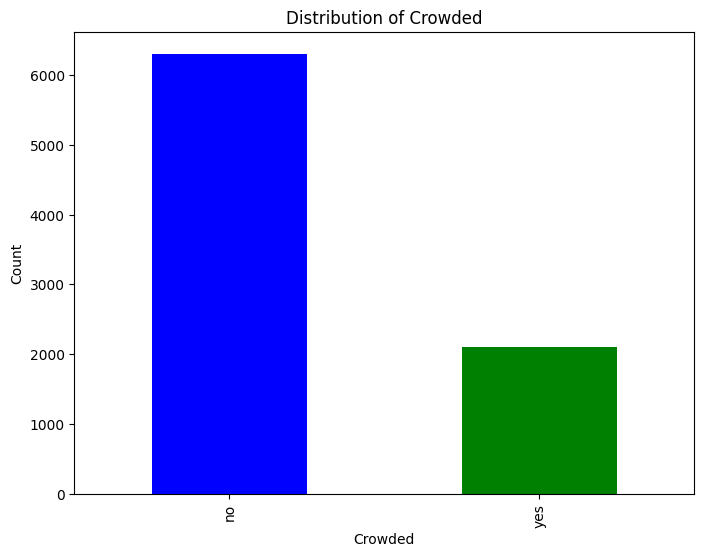

In [16]:
plt.figure(figsize=(8, 6))
WR_df['crowded'].value_counts().plot(kind='bar', color=['blue', 'green'])

plt.title('Distribution of Crowded')
plt.xlabel('Crowded')
plt.ylabel('Count')
plt.show()

### Data Balancing

In [17]:
from sklearn.utils import resample

majority_class = WR_df[WR_df['crowded'] == 'no']
minority_class = WR_df[WR_df['crowded'] == 'yes']

majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

balanced_df = pd.concat([majority_downsampled, minority_class])

print(balanced_df['crowded'].value_counts())

crowded
no     2100
yes    2100
Name: count, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [19]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y,test_y=train_test_split(X,y_encoded ,test_size=0.2)

In [20]:
train_X.shape, test_X.shape, train_y.shape,test_y.shape


((6720, 6), (1681, 6), (6720,), (1681,))

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true,y_pred)[0,0]
def fp(y_true, y_pred): return confusion_matrix(y_true,y_pred)[0,1]
def fn(y_true, y_pred): return confusion_matrix(y_true,y_pred)[1,0]
def tp(y_true, y_pred): return confusion_matrix(y_true,y_pred)[1,1]

scoring = {'tp': make_scorer(tp), 'tn' : make_scorer(tn),
           'fp': make_scorer(fp), 'fn' : make_scorer(fn)}

def display_result(result):
    print("TP: ", result['test_tp'])
    print("TN: ", result['test_tn'])
    print("FP: ", result['test_fp'])
    print("FN: ", result['test_fn'])

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score

acc = []
roc = []

clf = LogisticRegression()
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

ac = accuracy_score(test_y, y_pred)
acc.append(ac)

rc = roc_auc_score(test_y, y_pred)
roc.append(rc)

print("\nAccuracy {0} ROC {1}".format(ac, rc))
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)


Accuracy 0.7299226650803093 ROC 0.5
TP:  [0 0 0 0 0 0 0 0 0 0]
TN:  [508 508 508 508 507 507 507 507 507 507]
FP:  [0 0 0 0 0 0 0 0 0 0]
FN:  [164 164 164 164 165 165 165 165 165 165]


In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

ac = accuracy_score(test_y, y_pred)
acc.append(ac)

rc = roc_auc_score(test_y, y_pred)
roc.append(rc)

print("\nAccuracy {0} ROC {1}".format(ac, rc))
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)


Accuracy 0.7543129089827484 ROC 0.6631042009988188
TP:  [68 68 65 84 74 60 72 71 85 77]
TN:  [438 443 424 426 439 448 442 436 425 445]
FP:  [70 65 84 82 68 59 65 71 82 62]
FN:  [ 96  96  99  80  91 105  93  94  80  88]


In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_X,train_y)
y_pred = clf.predict(test_X)

ac = accuracy_score(test_y, y_pred)
acc.append(ac)

rc = roc_auc_score(test_y, y_pred)
roc.append(rc)

print("\nAccuracy {0} ROC {1}".format(ac, rc))
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)


Accuracy 0.7727543129089828 ROC 0.6674107543559198
TP:  [65 71 70 69 72 69 67 73 73 73]
TN:  [435 459 428 444 446 453 462 435 436 462]
FP:  [73 49 80 64 61 54 45 72 71 45]
FN:  [99 93 94 95 93 96 98 92 92 92]


In [26]:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred = clf.predict(test_X)

ac = accuracy_score(test_y, y_pred)
acc.append(ac)

rc = roc_auc_score(test_y, y_pred)
roc.append(rc)

print("\nAccuracy {0} ROC {1}".format(ac, rc))
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)


Accuracy 0.5907198096371208 ROC 0.7196414017929911
TP:  [164 164 164 164 165 165 165 165 165 165]
TN:  [188 208 195 199 213 198 212 201 185 195]
FP:  [320 300 313 309 294 309 295 306 322 312]
FN:  [0 0 0 0 0 0 0 0 0 0]


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred = clf.predict(test_X)

ac = accuracy_score(test_y, y_pred)
acc.append(ac)

rc = roc_auc_score(test_y, y_pred)
roc.append(rc)

print("\nAccuracy {0} ROC {1}".format(ac, rc))
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)


Accuracy 0.7941701368233195 ROC 0.6702856794086074
TP:  [54 64 60 69 71 69 64 58 72 76]
TN:  [470 478 471 467 471 485 482 475 469 474]
FP:  [38 30 37 41 36 22 25 32 38 33]
FN:  [110 100 104  95  94  96 101 107  93  89]


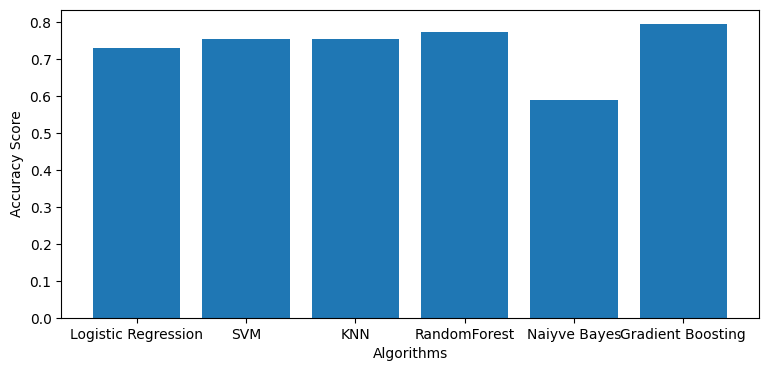

In [28]:
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','RandomForest','Naiyve Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algorithms')
plt.show()

### Save the model

In [29]:
import joblib

In [31]:
joblib_file = "gradient_boost_model.plk"
joblib.dump(clf, joblib_file)

['gradient_boost_model.plk']